<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [2]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [4]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())
boston_df=pd.read_csv(boston_url)

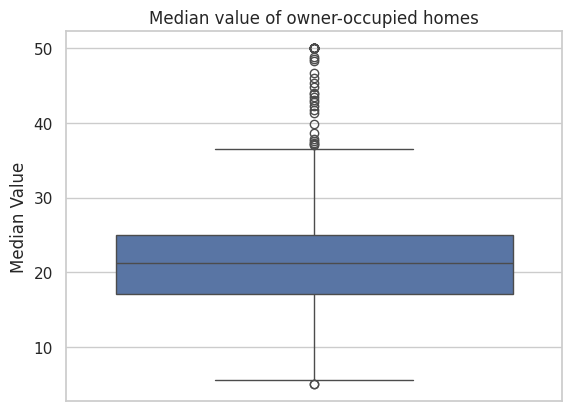

In [29]:
sns.boxplot(y='MEDV', data=boston_df)
plt.title('Median value of owner-occupied homes')
plt.ylabel('Median Value')
plt.show()

#### Add your code below following the instructions given in the course to complete the peer graded assignment


Text(0.5, 1.0, 'Charles River')

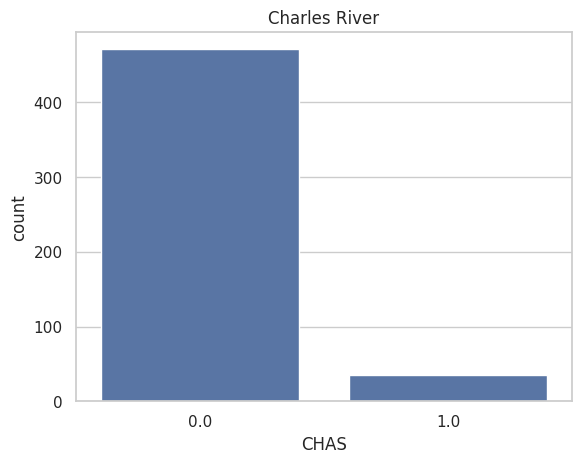

In [14]:
flop = sns.countplot(x = 'CHAS', data = boston_df)
flop.set_title('Charles River')

Text(0, 0.5, 'Median')

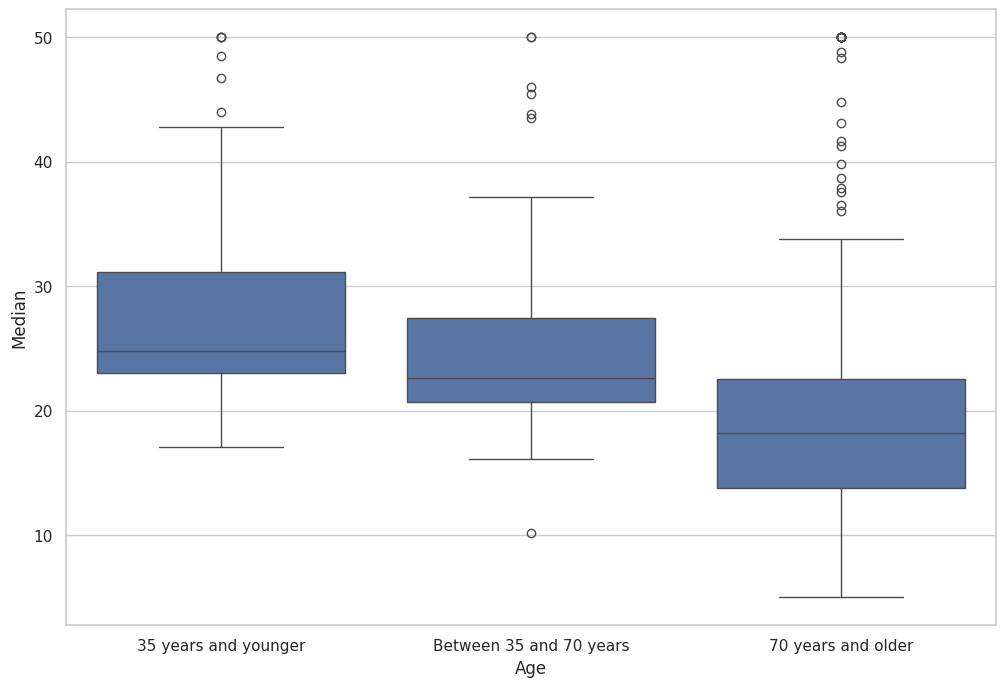

In [31]:
ages = [0, 35, 70, 100] 
labels = ['35 years and younger', 'Between 35 and 70 years', '70 years and older']
boston_df['Age Group'] = pd.cut(boston_df['AGE'], bins=ages, labels=labels)

plt.figure(figsize=(12, 8))
sns.boxplot(x='Age Group', y='MEDV', data=boston_df)
plt.xlabel('Age')
plt.ylabel('Median')


Text(0, 0.5, 'Nitric')

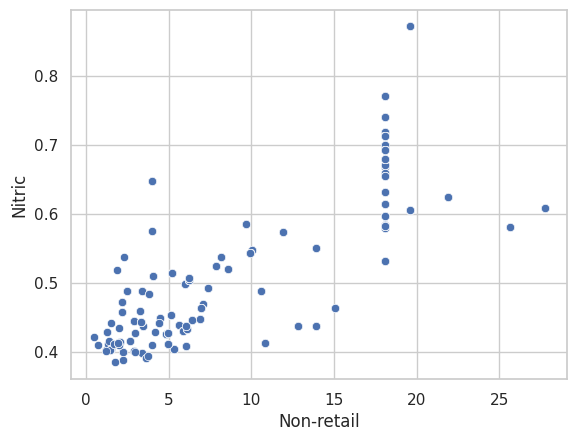

In [14]:
sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
plt.xlabel('Non-retail')
plt.ylabel('Nitric')


Text(0, 0.5, 'Count')

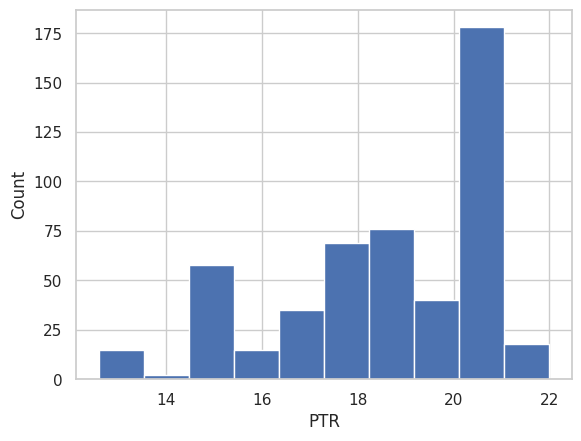

In [18]:
plt.hist(boston_df['PTRATIO'])
plt.xlabel('PTR')
plt.ylabel('Count')

In [47]:
river = boston_df[boston_df['CHAS'] == 1]['MEDV']
not_river = boston_df[boston_df['CHAS'] == 0]['MEDV']

t_stat, p_value = scipy.stats.ttest_ind(river, not_river, equal_var=False)

t_stat, p_value

(3.113291312794837, 0.003567170098137517)

Q6:There is a significant difference in median value of houses bounded by the Charles river.

In [49]:
x = ols('MEDV~AGE', data = boston_df).fit()
table = sm.stats.anova_lm(x)
table

,df,sum_sq,mean_sq,F,PR(>F)
AGE,1.0,6069.761065,6069.761065,83.477459,1.569982e-18
Residual,504.0,36646.534350,72.711378,NaN,NaN


Q7:There is a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940

In [45]:
corr_coefficient, p_value = scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
corr_coefficient, p_value

(0.7636514469209192, 7.913361061210442e-98)

Q8:there is relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

In [46]:
X = sm.add_constant(boston_df['DIS'])  
y = boston_df['MEDV']  
xy = sm.OLS(y, X).fit()
xy.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 26 Mar 2024   Prob (F-statistic):           1.21e-08
Time:                        10:21:24   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Q9: Increased value based on distance